# Importing the libraries & datasets

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

In [62]:
from matplotlib.colors import ListedColormap

def visualize(X_set, Y_set, classifier, sc, title, x_label, y_label, step = 1, scaled=True):
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step=step),
                        np.arange(start=X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step=step))

    if scaled:
        plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape), 
                    alpha=.75, cmap=ListedColormap(('red', 'green')))
    else:
        plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
                    alpha=.75, cmap=ListedColormap(('red', 'green')))
    
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    for i, j in enumerate(np.unique(Y_set)):
        plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c=ListedColormap(('red', 'green'))(i), label=j)
        
    plt.title(title)
    plt.xlabel(x_label)
    plt.xlabel(y_label)
    plt.legend()
    plt.show()

In [3]:
datasets = {'social nwtworks ads': pd.read_csv('Social_Network_Ads.csv')}
datasets['breast caancer'] = pd.read_csv('breast_cancer.csv')

In [4]:
dataset = datasets['social nwtworks ads']
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Preprocessing

## Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)
# y_train_scaled = sc.fit_transform(y_train.reshape(len(y_train),1))

# Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression

logistic_classifier = LogisticRegression(random_state = 0)
logistic_classifier.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

## Predicting the Test set results

In [8]:
y_pred_logistic = logistic_classifier.predict(X_test_scaled)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

## Making the Confusion Matrix

In [36]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

cm = {}
cm['Logistic'] = confusion_matrix(y_test, y_pred_logistic)
print(cm['Logistic'])
print('Accuracy: ', accuracy_score(y_test, y_pred_logistic))
print('F1 Score: ', f1_score(y_test, y_pred_logistic))
print('Precision: ', precision_score(y_test, y_pred_logistic))
print('Recall: ', recall_score(y_test, y_pred_logistic))


[[52  6]
 [ 3 19]]
Accuracy:  0.8875
F1 Score:  0.8085106382978724
Precision:  0.76
Recall:  0.8636363636363636


In [37]:
classifier_performances = pd.DataFrame(columns = ['Classifier', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])
classifier_performances.loc[0] = ['Logistic', accuracy_score(y_test, y_pred_logistic), f1_score(y_test, y_pred_logistic), precision_score(y_test, y_pred_logistic), recall_score(y_test, y_pred_logistic)]

### Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


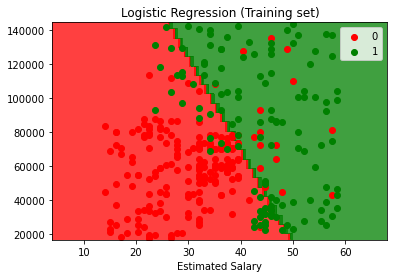

In [10]:
visualize(sc.inverse_transform(X_train_scaled), y_train, logistic_classifier, sc, 'Logistic Regression (Training set)', 'Age', 'Estimated Salary')

### Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


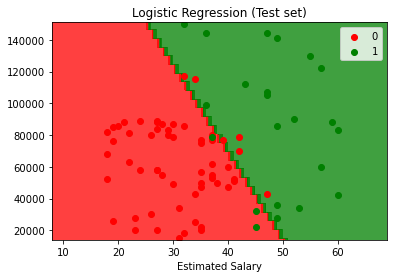

In [11]:
visualize(sc.inverse_transform(X_test_scaled), y_test, logistic_classifier, sc, 'Logistic Regression (Test set)', 'Age', 'Estimated Salary')

# Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state = 0)
dt_classifier.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=0)

## Predicting the Test set results

In [13]:
y_pred_dt = dt_classifier.predict(X_test_scaled)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

## Making the Confusion Matrix

In [40]:
cm['DT'] = confusion_matrix(y_test, y_pred_dt)
print(cm['DT'])
print('Accuracy: ', accuracy_score(y_test, y_pred_dt))
print('F1 Score: ', f1_score(y_test, y_pred_dt))
print('Precision: ', precision_score(y_test, y_pred_dt))
print('Recall: ', recall_score(y_test, y_pred_dt))


[[53  5]
 [ 2 20]]
Accuracy:  0.9125
F1 Score:  0.8510638297872342
Precision:  0.8
Recall:  0.9090909090909091


In [41]:
classifier_performances.loc[1] = ['DT', 
                                    accuracy_score(y_test, y_pred_dt), 
                                    f1_score(y_test, y_pred_dt), 
                                    precision_score(y_test, y_pred_dt), 
                                    recall_score(y_test, y_pred_dt)]

### Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


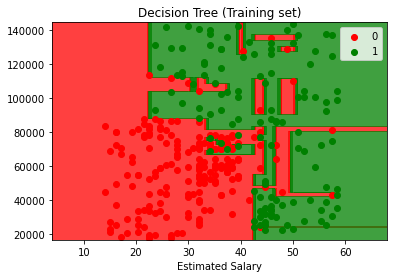

In [15]:
visualize(sc.inverse_transform(X_train_scaled), y_train, dt_classifier, sc, 'Decision Tree (Training set)', 'Age', 'Estimated Salary')

### Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


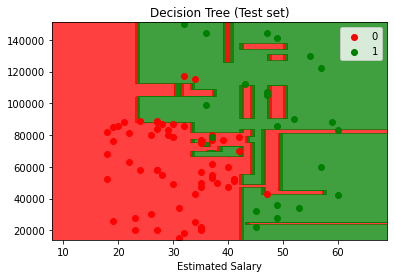

In [16]:
visualize(sc.inverse_transform(X_test_scaled), y_test, dt_classifier, sc, 'Decision Tree (Test set)', 'Age', 'Estimated Salary')

# K-NN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier()

## Predicting the Test set results

In [18]:
y_pred_knn = knn_classifier.predict(X_test_scaled)
# print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

## Making the Confusion Matrix

In [19]:
cm['K-NN']= confusion_matrix(y_test, y_pred_knn)
print(cm['K-NN'])
accuracy['K-NN'] = accuracy_score(y_test, y_pred_knn)
print(accuracy['K-NN'])

[[54  4]
 [ 1 21]]
0.9375


In [42]:
cm['K-NN'] = confusion_matrix(y_test, y_pred_knn)
print(cm['K-NN'])
print('Accuracy: ', accuracy_score(y_test, y_pred_knn))
print('F1 Score: ', f1_score(y_test, y_pred_knn))
print('Precision: ', precision_score(y_test, y_pred_knn))
print('Recall: ', recall_score(y_test, y_pred_knn))


[[54  4]
 [ 1 21]]
Accuracy:  0.9375
F1 Score:  0.8936170212765958
Precision:  0.84
Recall:  0.9545454545454546


In [43]:
classifier_performances.loc[2] = ['K-NN', 
                                    accuracy_score(y_test, y_pred_knn), 
                                    f1_score(y_test, y_pred_knn), 
                                    precision_score(y_test, y_pred_knn), 
                                    recall_score(y_test, y_pred_knn)]

## Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


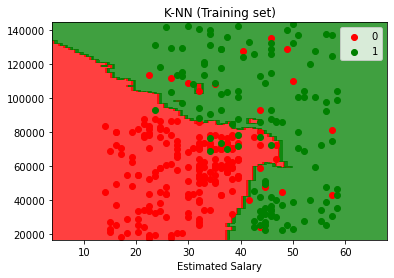

In [20]:
visualize(sc.inverse_transform(X_train_scaled), y_train, knn_classifier, sc, 'K-NN (Training set)', 'Age', 'Estimated Salary')

## Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


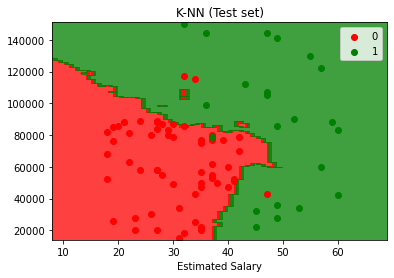

In [21]:
visualize(sc.inverse_transform(X_test_scaled), y_test, knn_classifier, sc, 'K-NN (Test set)', 'Age', 'Estimated Salary')

# Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

cm['RF'] = confusion_matrix(y_test, y_pred_rf)
print(cm['RF'])

print('Accuracy: ', accuracy_score(y_test, y_pred_rf))
print('F1 Score: ', f1_score(y_test, y_pred_rf))
print('Precision: ', precision_score(y_test, y_pred_rf))
print('Recall: ', recall_score(y_test, y_pred_rf))

classifier_performances.loc[3] = ['RF', 
                                    accuracy_score(y_test, y_pred_rf), 
                                    f1_score(y_test, y_pred_rf), 
                                    precision_score(y_test, y_pred_rf), 
                                    recall_score(y_test, y_pred_rf)]

[[54  4]
 [ 3 19]]
Accuracy:  0.9125
F1 Score:  0.8444444444444444
Precision:  0.8260869565217391
Recall:  0.8636363636363636


# SVC

In [22]:
from sklearn.svm import SVC

linear_svm = SVC(kernel='linear', random_state=0)
linear_svm.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=0)

In [23]:
y_pred_svm = linear_svm.predict(X_test_scaled)
# print(np.concatenate((y_pred.reshape(len(y_pred), 1),y_test.reshape(len(y_test), 1)), 1))

In [ ]:
cm['SVC'] = confusion_matrix(y_test, y_pred_svm)
print(cm['SVC'])
print('Accuracy: ', accuracy_score(y_test, y_pred_svm))
print('F1 Score: ', f1_score(y_test, y_pred_svm))
print('Precision: ', precision_score(y_test, y_pred_svm))
print('Recall: ', recall_score(y_test, y_pred_svm))


[[53  5]
 [ 2 20]]
Accuracy:  0.9125
F1 Score:  0.8510638297872342
Precision:  0.8
Recall:  0.9090909090909091


In [52]:
classifier_performances.loc[4] = ['SVC', 
                                    accuracy_score(y_test, y_pred_svm), 
                                    f1_score(y_test, y_pred_svm), 
                                    precision_score(y_test, y_pred_svm), 
                                    recall_score(y_test, y_pred_svm)]

## Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


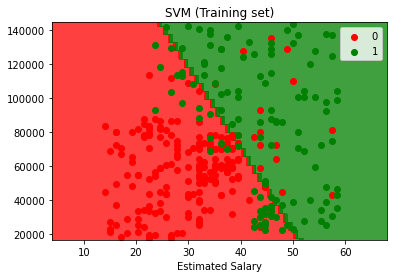

In [25]:
visualize(sc.inverse_transform(X_train_scaled), y_train, linear_svm, sc, 'SVM (Training set)', 'Age', 'Estimated Salary')

## Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


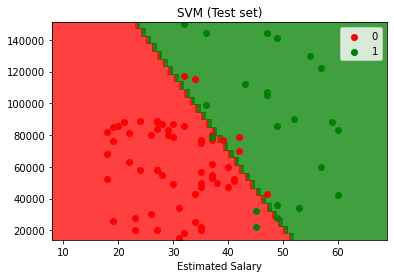

In [26]:
visualize(sc.inverse_transform(X_test_scaled), y_test, linear_svm, sc, 'SVM (Test set)', 'Age', 'Estimated Salary')

# SVC - RBF

In [27]:
from sklearn.svm import SVC

rbf_svm = SVC(kernel='rbf', random_state=0)
rbf_svm.fit(X_train_scaled, y_train)

SVC(random_state=0)

In [28]:
y_pred_svm_rbf = rbf_svm.predict(X_test_scaled)
# print(np.concatenate((y_pred.reshape(len(y_pred), 1),y_test.reshape(len(y_test), 1)), 1))

In [29]:
cm['SVM - RBF'] = confusion_matrix(y_test, y_pred_svm_rbf)
print(cm['SVM - RBF'])
accuracy['SVM - RBF'] = accuracy_score(y_test, y_pred_svm_rbf)
print(accuracy['SVM - RBF'])

[[54  4]
 [ 1 21]]
0.9375


In [ ]:
cm['SVC - RBF'] = confusion_matrix(y_test, y_pred_svm_rbf)
print(cm['SVC - RBF'])
print('Accuracy: ', accuracy_score(y_test, y_pred_svm_rbf))
print('F1 Score: ', f1_score(y_test, y_pred_svm_rbf))
print('Precision: ', precision_score(y_test, y_pred_svm_rbf))
print('Recall: ', recall_score(y_test, y_pred_svm_rbf))


[[53  5]
 [ 2 20]]
Accuracy:  0.9125
F1 Score:  0.8510638297872342
Precision:  0.8
Recall:  0.9090909090909091


In [53]:
classifier_performances.loc[5] = ['SVC - RBF',
                                    accuracy_score(y_test, y_pred_svm_rbf), 
                                    f1_score(y_test, y_pred_svm_rbf), 
                                    precision_score(y_test, y_pred_svm_rbf), 
                                    recall_score(y_test, y_pred_svm_rbf)]

## Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


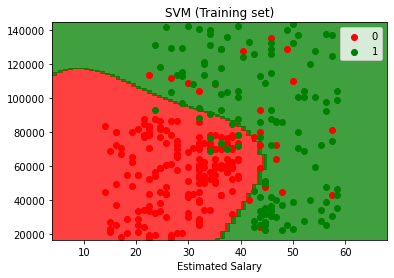

In [30]:
visualize(sc.inverse_transform(X_train_scaled), y_train, rbf_svm, sc, 'SVM (Training set)', 'Age', 'Estimated Salary')

## Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


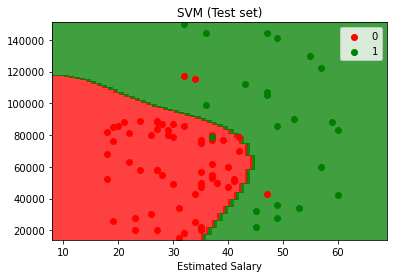

In [31]:
visualize(sc.inverse_transform(X_test_scaled), y_test, rbf_svm, sc, 'SVM (Test set)', 'Age', 'Estimated Salary')

# GaussianNB

In [46]:
from sklearn.naive_bayes import GaussianNB

gaussian_classifier = GaussianNB()
gaussian_classifier.fit(X_train, y_train)

GaussianNB()

In [48]:
y_pred_gaussian = gaussian_classifier.predict(X_test)

In [49]:
cm['GaussianNB'] = confusion_matrix(y_test, y_pred_gaussian)
print(cm['GaussianNB'])
print('Accuracy: ', accuracy_score(y_test, y_pred_gaussian))
print('F1 Score: ', f1_score(y_test, y_pred_gaussian))
print('Precision: ', precision_score(y_test, y_pred_gaussian))
print('Recall: ', recall_score(y_test, y_pred_gaussian))


[[56  2]
 [ 4 18]]
Accuracy:  0.925
F1 Score:  0.8571428571428572
Precision:  0.9
Recall:  0.8181818181818182


In [54]:
classifier_performances.loc[6] = ['GaussianNB',
                                    accuracy_score(y_test, y_pred_gaussian), 
                                    f1_score(y_test, y_pred_gaussian), 
                                    precision_score(y_test, y_pred_gaussian), 
                                    recall_score(y_test, y_pred_gaussian)]

## Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


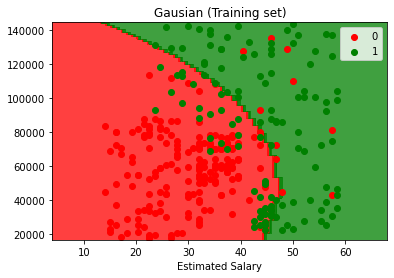

In [64]:
visualize(sc.inverse_transform(X_train_scaled), y_train, gaussian_classifier, sc, 'Gausian (Training set)', 'Age', 'Estimated Salary', scaled=False)

## Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


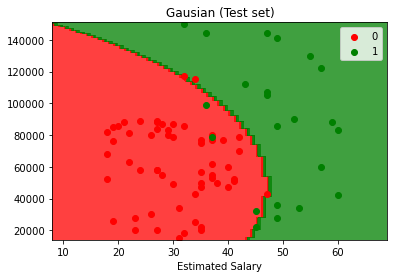

In [65]:
visualize(sc.inverse_transform(X_test_scaled), y_test, gaussian_classifier, sc, 'Gausian (Test set)', 'Age', 'Estimated Salary', scaled=False)

# Classifier Evaluations

In [55]:
classifier_performances

,Classifier,Accuracy,F1 Score,Precision,Recall
0,Logistic,0.8875,0.808511,0.760000,0.863636
1,DT,0.9125,0.851064,0.800000,0.909091
2,K-NN,0.9375,0.893617,0.840000,0.954545
3,RF,0.9125,0.844444,0.826087,0.863636
4,SVC,0.8875,0.808511,0.760000,0.863636
5,SVC - RBF,0.9375,0.893617,0.840000,0.954545
6,GaussianNB,0.9250,0.857143,0.900000,0.818182


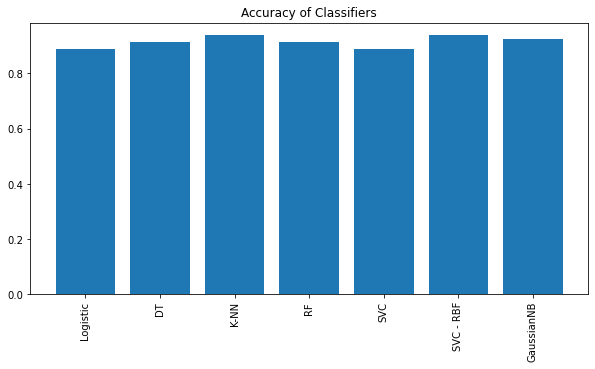

In [56]:
plt.figure(figsize = (10, 5))
plt.bar(classifier_performances['Classifier'], classifier_performances['Accuracy'])
plt.title('Accuracy of Classifiers')
plt.xticks(rotation = 'vertical')
plt.show()

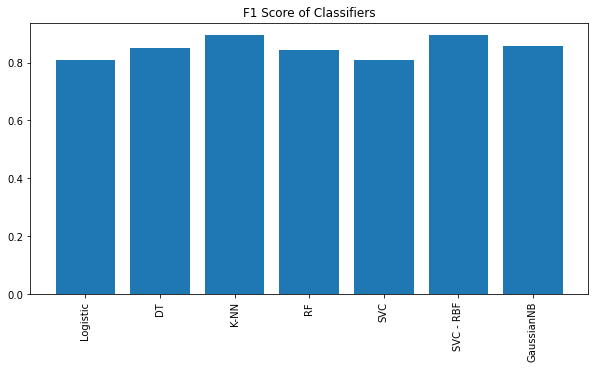

In [57]:
plt.figure(figsize = (10, 5))
plt.bar(classifier_performances['Classifier'], classifier_performances['F1 Score'])
plt.title('F1 Score of Classifiers')
plt.xticks(rotation = 'vertical')
plt.show()

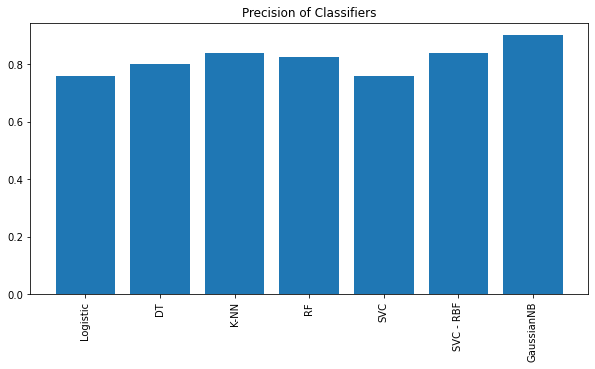

In [58]:
plt.figure(figsize = (10, 5))
plt.bar(classifier_performances['Classifier'], classifier_performances['Precision'])
plt.title('Precision of Classifiers')
plt.xticks(rotation = 'vertical')
plt.show()

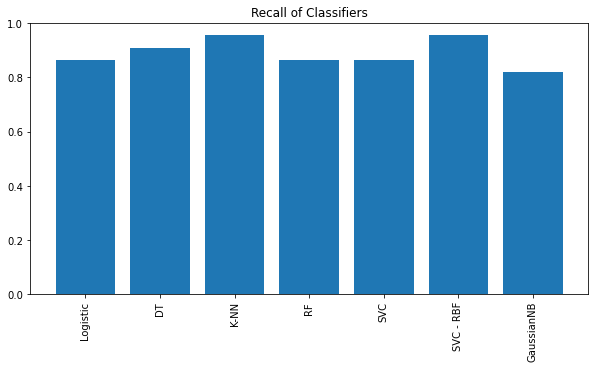

In [59]:
plt.figure(figsize = (10, 5))
plt.bar(classifier_performances['Classifier'], classifier_performances['Recall'])
plt.title('Recall of Classifiers')
plt.xticks(rotation = 'vertical')
plt.show()

# Conclusion

It looks like K-NN, SVC (with RBF kernel) & Gausian Classifier are better at this dataset's classification, with Gaussian classifier having Higher precision over all other classifiers.